In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [5]:
df_allyear=pd.read_csv(r"C:\Users\Amin\Downloads\Original_2017_full.csv")

In [6]:
new_names=["country", "year", "happiness", "log_gdp_per_cap", "social_support",
           "life_expectancy", "freedom", "generosity", "corruption_perception",
           "positive_affect", "negative_affect","confidence_in_government",
           "democratic_quality", "delivery_quality", "happiness_sd",
           "happiness_sd/mean", "gini_index", "gini_index(2000-15)",
           "household_income_gini"]

In [7]:
df_allyear.columns=new_names

In [8]:
len(df_allyear["country"].unique())
#we have 164 countries and it's a lot 
#so we will only look at the trend by major regions

164

In [9]:
df_region=pd.read_csv(r"C:\Users\Amin\Downloads\Original_2017_region.csv").rename(
    columns={"Region indicator":"region"})

In [10]:
#merge with dataset that has region indicator
df_allyear=pd.merge(df_allyear,df_region,on="country")

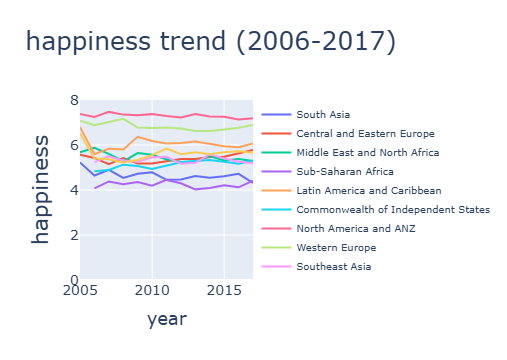

In [11]:
layout=go.Layout(title="happiness trend (2006-2017)",font=dict(size=18),
                 xaxis=dict(title="year",title_font=dict(size=18),
                            tickfont=dict(size=14)),
                 yaxis=dict(range=[0,8],title="happiness",
                            tickfont=dict(size=14)),
                 legend=dict(font=dict(size=10)))
fig={"data": [{"x":df_allyear[df_allyear["region"]==region].groupby("year").agg(
                            {"happiness":"mean"}).reset_index()["year"],
               "y":df_allyear[df_allyear["region"]==region].groupby("year").agg(
                            {"happiness":"mean"}).reset_index()["happiness"],
               "name":region,"mode":"lines",} for region in df_allyear["region"].unique()], "layout": layout}
py.iplot(fig)

In [12]:
#happiness by country (2016)
df_2016=df_allyear[df_allyear["year"]==2016]

In [13]:
#we need the country code for visualization and so we need to merge this dataset with 
#another dataset with country code and when we merge we also include the data about the 
#percentage of people having religion per country in our merge for later use.
df_religion_iso=pd.read_csv(r"C:\Users\Amin\Downloads\relig_iso.csv")

In [14]:
df_religion_iso=df_religion_iso[["iso","country","percentage_non_religious"]]
df_religion_iso["religion_pct"]=100-df_religion_iso["percentage_non_religious"]
df_religion_iso=df_religion_iso[["iso","country","religion_pct"]].rename(
    columns={"iso":"country_code"})

In [15]:
#renaming the countries that do not match with the original happiness dataset
new_names = {'Bosnia Herzegovina': 'Bosnia and Herzegovina',
             'Republic of Congo': 'Congo (Brazzaville)',
             'Democratic Republic of the Congo': 'Congo (Kinshasa)',
             'Finland ': 'Finland',
             'Kyrgyz Republic': 'Kyrgyzstan',
             'Macedonia (FYR)': 'Macedonia',
             'Sudan': 'South Sudan',
             'Taiwan': 'Taiwan Province of China',
             'United States of America': 'United States'}

In [16]:
df_religion_iso.replace({"country":new_names},inplace=True)

In [17]:
#merging the datasets keeping all rows in the df dataset
df_2016=pd.merge(df_2016,df_religion_iso,how="left", on="country")

In [18]:
df_heatmap=df_2016[["country","country_code","happiness"]]

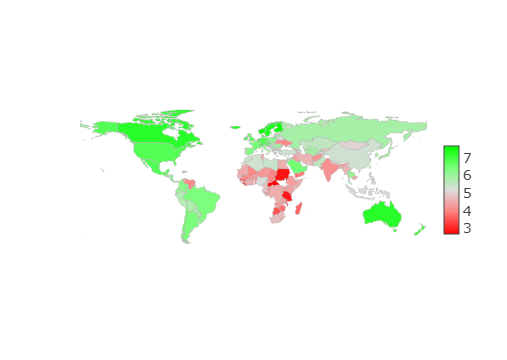

In [19]:
data=[dict(type="choropleth", locations=df_heatmap["country_code"],
           z=df_heatmap["happiness"],text=df_heatmap["country"], 
           colorscale=[[0,"rgb(0,255,0)"],[0.25,"rgb(122,255,122)"],
                       [0.5,"rgb(220,220,220)"],[0.75,"rgb(255,128,128)"],
                       [1,"rgb(255,0,0)"]], autocolorscale=False, reversescale=True,
           marker=dict(line=dict(color="rgb(180,180,180)",width=0.5)),
           colorbar=dict(autotick=False, title="happiness",thickness=15,
                         len=0.6,tickfont=dict(size=14),
           titlefont=dict(size=14)),)]
layout=dict(title="happiness by country (2016)",font=dict(size=18),
                       geo=dict(showframe=False, showcoastlines=False, projection=dict(type="Mercator")))
fig=dict(data=data,layout=layout)
py.iplot(fig,validate=False,filename="world-heatmap")
           

In [20]:
#as seen countries that top the happiness list tend to be wealthy
#countries, now we are going to find out if there is really a 
#relationship between a country's happiness and its GDP per capita.abs

In [21]:
df_2016["gdp_per_cap"]=np.exp(df_2016["log_gdp_per_cap"])

In [22]:
df_gdp=df_2016[["region","happiness","gdp_per_cap","country"]]
region=df_2016["region"]

In [23]:
#right format for charting
df_gdp2=pd.get_dummies(df_gdp["region"])

In [24]:
df_gdp=pd.concat([df_gdp,df_gdp2],axis=1)

In [25]:
region = df_gdp2.columns

In [26]:
for a in region:
    df_gdp[a+"_happiness"]=df_gdp[a]*df_gdp["happiness"]
    df_gdp[a+"_gdp_per_cap"]=df_gdp[a]*df_gdp["gdp_per_cap"]
    df_gdp[a+"_country"]=df_gdp[a]*df_gdp["country"]

In [27]:
df_gdp.replace(0,np.nan,inplace=True)

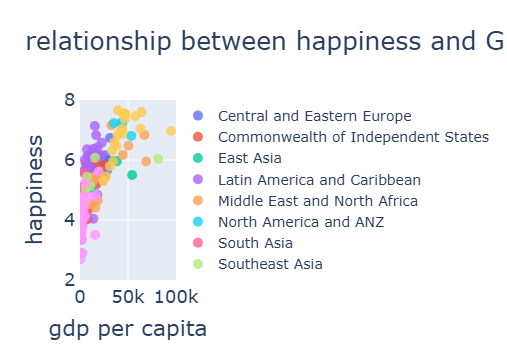

In [28]:
trace=[go.Scatter(y=df_gdp[a+"_happiness"],x=df_gdp[a+"_gdp_per_cap"],
                 text=df_gdp[a+"_country"],mode="markers",marker=dict(size=10,opacity=0.8),
                 name=a) for a in region]
data=trace
layout=go.Layout(title="relationship between happiness and GDP", font=dict(size=18),
                xaxis=dict(title="gdp per capita",range=[0,100000],showline=True),
                yaxis=dict(title="happiness",range=[2,8],showline=True), 
                legend=dict(font=dict(size=14)))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [29]:
#seems like there is an overall positive relationship between happiness and GDP per capita except 
#for Latin America-they have pretty low GDP and yet, their happiness level is comparable to some 
#countries with much higher GDP.

In [30]:
#relationship between the happiness of a country and the social support

In [31]:
df_social=df_2016[["region","happiness", "social_support","country"]]

In [32]:
df_social2=pd.get_dummies(df_social["region"])

In [33]:
df_social=pd.concat([df_social,df_social2],axis=1)

In [34]:
for a in region:
    df_social[a+"_happiness"]=df_social[a]*df_social["happiness"]
    df_social[a+"_social_support"]=df_social[a]*df_social["social_support"]
    df_social[a+"_country"]=df_social[a]*df_social["country"]

In [35]:
df_social.replace(0,np.nan,inplace=True)

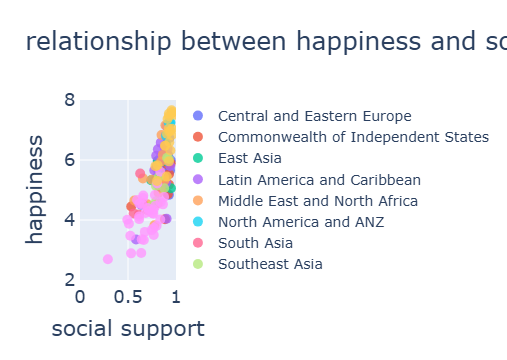

In [36]:
trace=[go.Scatter(y=df_social[a+"_happiness"],x=df_social[a+"_social_support"],
                 text=df_social[a+"_country"],mode="markers",marker=dict(size=10,opacity=0.8),
                 name=a) for a in region]
data=trace
layout=go.Layout(title="relationship between happiness and social support", font=dict(size=18),
                xaxis=dict(title="social support",range=[0,1],showline=True),
                yaxis=dict(title="happiness",range=[2,8],showline=True), 
                legend=dict(font=dict(size=14)))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [37]:
#looks like there is a strong positive correlation 
#between happiness and social support. 
#thus, support from families and friends may be one of the 
#reasons why Latin Americans (who have a high social support score)
#are happy.

In [38]:
#relationship between religion and happiness

In [39]:
df_religion=df_2016[["region","happiness","religion_pct","country"]]

In [40]:
df_religion2=pd.get_dummies(df_religion["region"])

In [41]:
df_religion=pd.concat([df_religion,df_religion2],axis=1)

In [42]:
for a in region:
    df_religion[a+'_happiness']=df_religion[a]*df_religion['happiness']
    df_religion[a+'_religion_pct']=df_religion[a]*df_religion['religion_pct']
    df_religion[a+'_country']=df_religion[a]*df_religion['country']

In [43]:
df_religion.replace(0, np.nan, inplace=True)

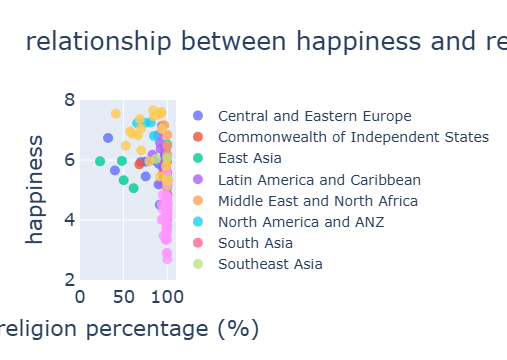

In [44]:
trace=[go.Scatter(y=df_religion[a+'_happiness'],x=df_religion[a+'_religion_pct'],
                     text=df_religion[a+'_country'],mode='markers',marker=dict(size=10, opacity=0.8), 
                     name=a) for a in region]
data = trace
layout = go.Layout(title='relationship between happiness and religion', 
                    font=dict(size=18),
                    yaxis=dict(title='happiness', range=[2, 8],showline=True),
                    xaxis=dict(title='religion percentage (%)',range=[0, 110], showline=True), 
                    legend=dict(font=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [45]:
#from this graph, there is no obvious relationship between happiness 
#and religion-there are countries with a low percentage of people 
#having religion and yet they are happy such as Netherlands, 
#New Zealand, Sweden, etc.; on the other hand there are also 
#faithful but unhappy countries like those in Sub-Saharan Africa.

In [46]:
#happy allele and happiness relationship

In [52]:
happy_list = ['Denmark', 'Norway', 'Sweden', 'Argentina', 'Bolivia', 'Brazil',
              'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador',
              'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Mexico', 'Nicaragua',
              'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

In [60]:
df_2016["happy_gene"]=df_2016["country"].apply(lambda x: 1 if x in happy_list else 0)

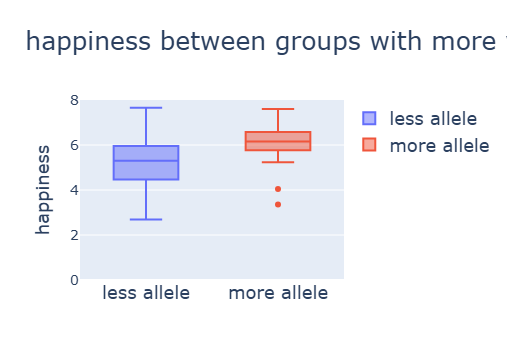

In [61]:
trace0=go.Box(y=df_2016['happiness'][df_2016['happy_gene']==0].values, 
                name="less allele")
trace1=go.Box(y=df_2016['happiness'][df_2016['happy_gene']==1].values,
                name="more allele")
data = [trace0, trace1]
layout = go.Layout(title="happiness between groups with more vs less happy allele",
                   font=dict(size=18),
                   yaxis=dict(range=[0, 8], title=dict(text="happiness", font=dict(size=18)),
                              tickfont=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [68]:
#relationship between happiness and freedom

In [69]:
df_freedom = df_2016[['region', 'happiness', 'freedom', 'country']]

In [70]:
df_freedom2 = pd.get_dummies(df_freedom['region'])


In [71]:
df_freedom = pd.concat([df_freedom, df_freedom2], axis=1)

In [72]:
for a in region:
    df_freedom[a + '_happiness'] = df_freedom[a] * df_freedom['happiness']
    df_freedom[a + '_freedom'] = df_freedom[a] * df_freedom['freedom']
    df_freedom[a + '_country'] = df_freedom[a] * df_freedom['country']

In [73]:
df_freedom.replace(0, np.nan, inplace=True)

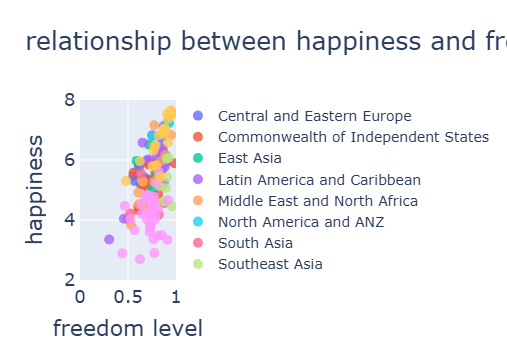

In [75]:
trace = [go.Scatter(y=df_freedom[a + '_happiness'], x=df_freedom[a + '_freedom'],
                    text=df_freedom[a + '_country'], mode='markers', marker=dict(size=10, opacity=0.8),  
                    name=a) for a in region]
data = trace
layout = go.Layout(title='relationship between happiness and freedom', font=dict(size=18),
                    yaxis=dict(title='happiness', range=[2, 8], showline=True),
                    xaxis=dict(title='freedom level', range=[0, 1], showline=True), 
                    legend=dict(font=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [76]:
#relationship between happiness and life expectancy

In [77]:
df_life = df_2016[['region', 'happiness', 'life_expectancy', 'country']]

In [78]:
df_life2 = pd.get_dummies(df_life['region'])

In [79]:
df_life = pd.concat([df_life, df_life2], axis=1)

In [80]:
for a in region:
    df_life[a + '_happiness'] = df_life[a] * df_life['happiness']
    df_life[a + '_life_expectancy'] = df_life[a] * df_life['life_expectancy']
    df_life[a + '_country'] = df_life[a] * df_life['country']

In [81]:
df_life.replace(0, np.nan, inplace=True)

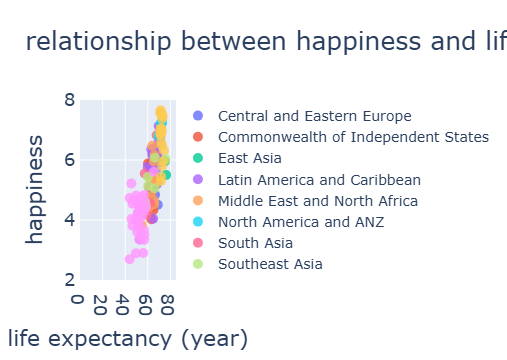

In [83]:
trace = [go.Scatter(y=df_life[a + '_happiness'], x=df_life[a + '_life_expectancy'],
                    text=df_life[a + '_country'], mode='markers', marker=dict(size=10, opacity=0.8), 
                    name=a) for a in region]
data = trace
layout = go.Layout(title='relationship between happiness and life expectancy',
                    font=dict(size=18),
                    yaxis=dict(title='happiness', range=[2, 8], showline=True),
                    xaxis=dict(title='life expectancy (year)', range=[0, 85], showline=True), 
                    legend=dict(font=dict(size=14)))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [84]:
#relationship between religion and GDP

In [85]:
df_religion_gdp = df_2016[['region', 'gdp_per_cap', 'religion_pct', 'country']]

In [86]:
df_religion_gdp2 = pd.get_dummies(df_religion_gdp['region'])

In [87]:
df_religion_gdp = pd.concat([df_religion_gdp, df_religion_gdp2], axis=1)

In [88]:
for a in region:
    df_religion_gdp[a + '_gdp_per_cap'] = df_religion_gdp[a] * df_religion_gdp['gdp_per_cap']
    df_religion_gdp[a + '_religion_pct'] = df_religion_gdp[a] * df_religion_gdp['religion_pct']
    df_religion_gdp[a + '_country'] = df_religion_gdp[a] * df_religion_gdp['country']

In [89]:
df_religion_gdp.replace(0, np.nan, inplace=True)

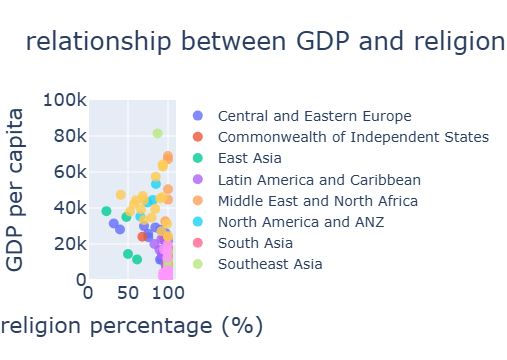

In [90]:
trace2 = [go.Scatter(y=df_religion_gdp[a + '_gdp_per_cap'], x=df_religion_gdp[a + '_religion_pct'],
                     text=df_religion_gdp[a + '_country'], mode='markers', 
                     marker=dict(size=10, opacity=0.8), name=a) for a in region]
data2 = trace2
layout2 = go.Layout(title='relationship between GDP and religion',
                    font=dict(size=18),
                    yaxis=dict(title='GDP per capita',range=[0, 100000]),
                    xaxis=dict(title='religion percentage (%)', range=[0, 110]),
                    legend=dict(font=dict(size=14)))
fig2 = go.Figure(data=data2, layout=layout2)
py.iplot(fig2)